### Database Construction based on SQL

In [ ]:
from sqlDatabaseConstructor import sqlDatabaseConstructor

sql_database = sqlDatabaseConstructor()

#### paper

"Venue", "Paper Openreview ID", "Title", "Abstract", "Author Openreview IDs", "Author Full Names", "Paper Decision", "Paper pdf link", "revisions"

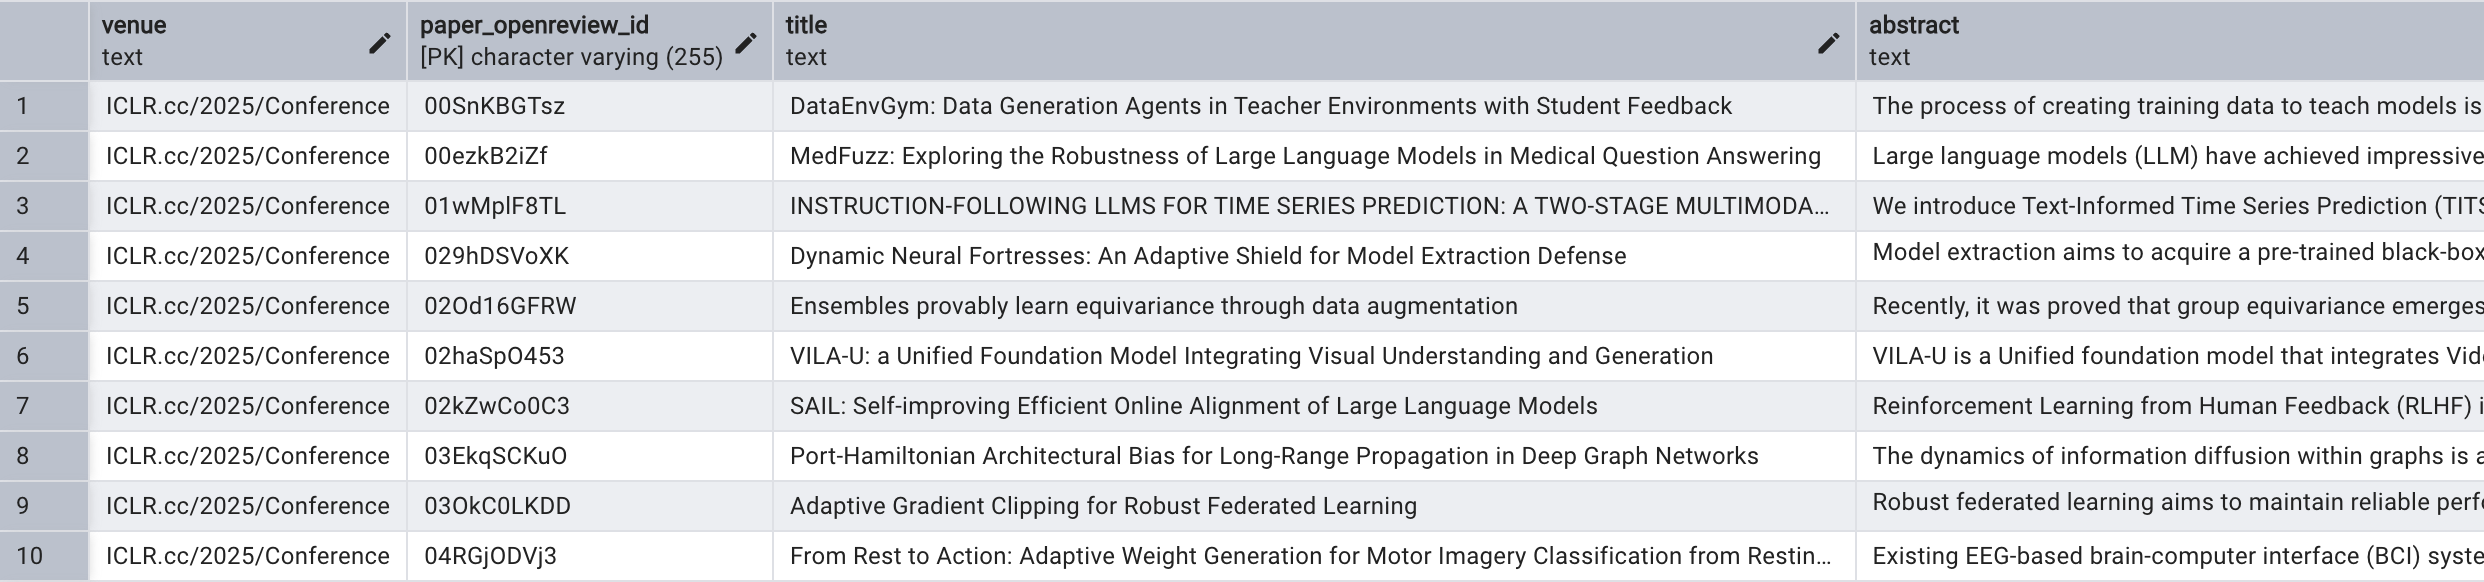

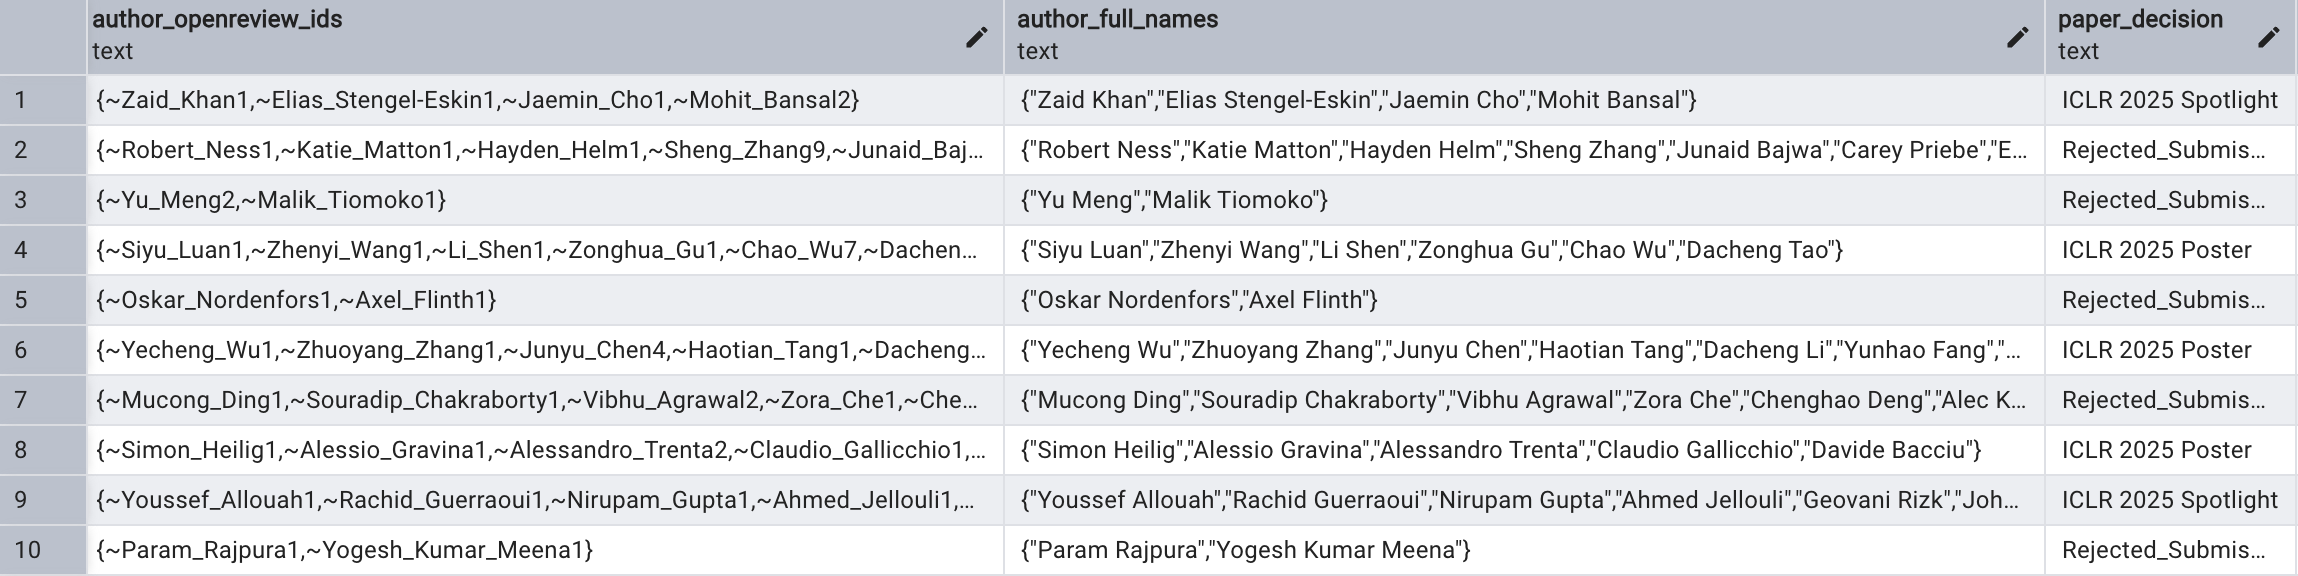

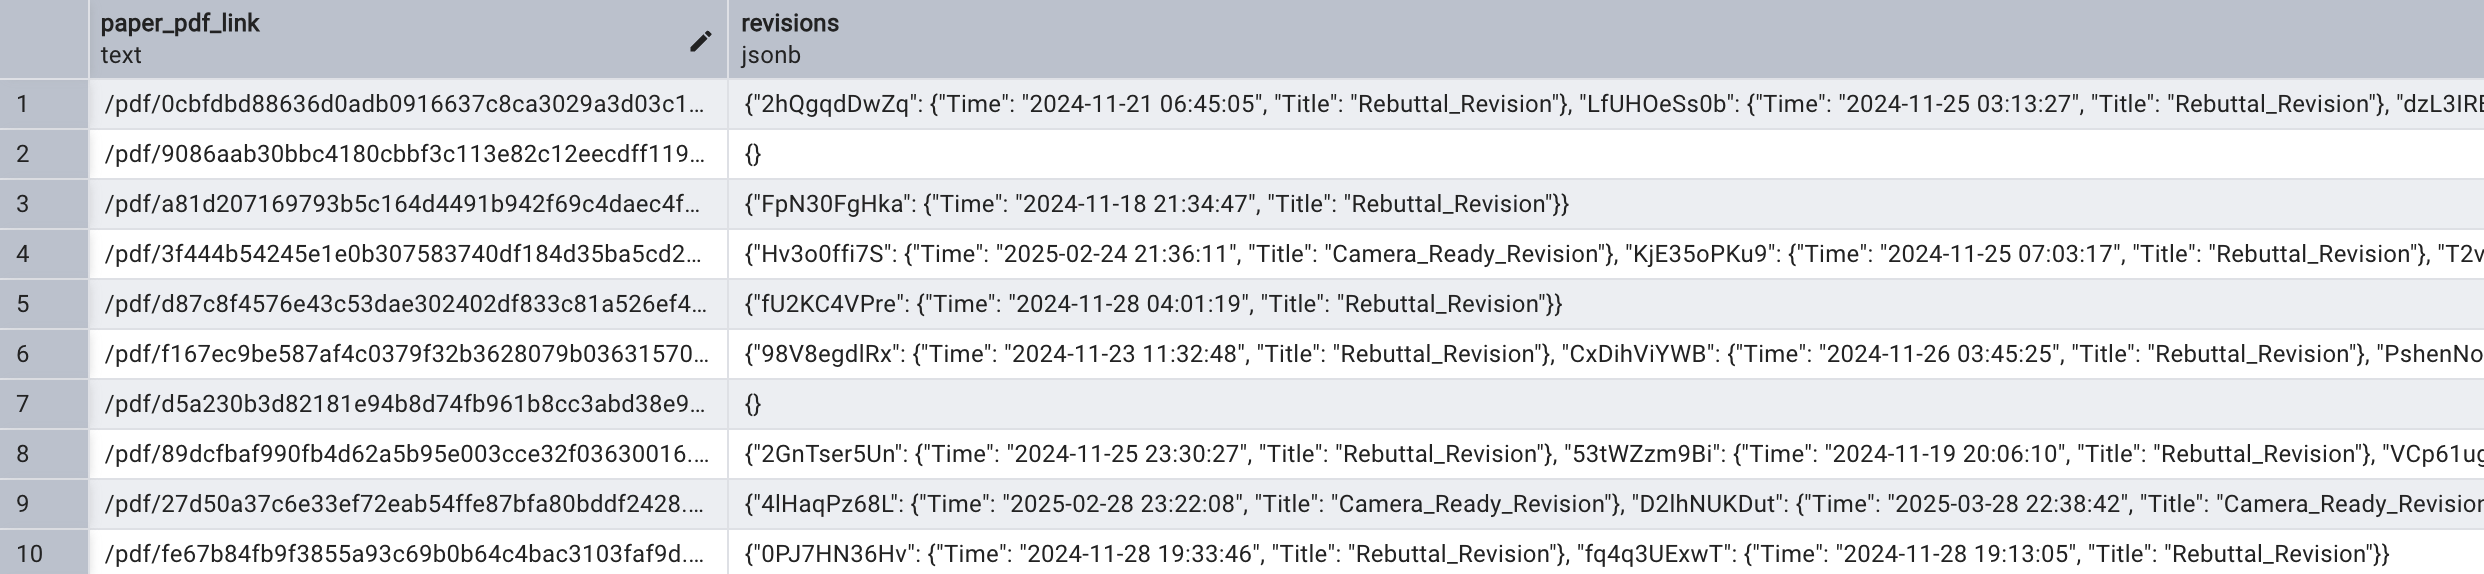

In [3]:
venue_id = 'ICLR.cc/2025/Conference'
sql_database.construct_paper_table(venue_id)

Table 'papers' created successfully.


 84%|████████▍ | 9790/11672 [58:32<12:04,  2.60it/s]  

Retrying request: GET /notes/edits?note.id=AAZ3vwyQ4X, response: no response, error: [SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1017)


100%|██████████| 11672/11672 [1:10:24<00:00,  2.76it/s]


retrieve pdf through id

In [ ]:
import requests

def get_pdf(id, pdf_name):
    # pdf url
    pdf_url = "https://openreview.net/notes/edits/attachment?id="+id+"&name=pdf"
    
    headers = {
        "User-Agent": "Mozilla/5.0"
    }
    response = requests.get(pdf_url, headers=headers)
    if response.status_code == 200:
        with open(pdf_name, "wb") as f:
            f.write(response.content)
        print("✅ PDF is downloaded as "+pdf_name)
    else:
        print("❌ Failure, Status Code: ", response.status_code)

compare differences between two pdf

In [ ]:
from pdfminer.high_level import extract_text
import difflib
from tqdm import tqdm

pdf_original = "downloaded1.pdf"
pdf_modified = "downloaded.pdf"

def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

def compare_texts(text1, text2):
    diff = difflib.unified_diff(
        text1.splitlines(),
        text2.splitlines(),
        fromfile='Original',
        tofile='Modified',
        lineterm=''
    )
    return '\n'.join(diff)

def parse_diff(diff_text):
    lines = diff_text.splitlines()
    
    all_diff = []
    current_diff = None
    for line in tqdm(lines[2:]):
        # Check for diff change markers
        if line.startswith('@@'):
            if current_diff is not None:
                # Add the previous diff to the corresponding list
                all_diff.append(current_diff)
            # Start a new diff block
            current_diff = {
                'context_before': "",
                'context_after': "",
                'original_lines': "",
                'modified_lines': "",
            }
        elif line.startswith('-'):
            current_diff['original_lines'] = current_diff['original_lines'] + line[1:].strip() + " "
        elif line.startswith('+'):
            current_diff['modified_lines'] = current_diff['modified_lines'] + line[1:].strip() + " "
        elif line.strip() != "" and (current_diff['original_lines'] == "" and current_diff['modified_lines'] == ""):
            current_diff['context_before'] = current_diff['context_before'] + line.strip() + " "
        elif line.strip() != "" and (current_diff['original_lines'] != "" or current_diff['modified_lines'] != ""):
            current_diff['context_after'] = current_diff['context_after'] + line.strip() + " "
            
    print("successfully build all_diff")
    
    return all_diff

# extract text
original = extract_text_from_pdf(pdf_original)
modified = extract_text_from_pdf(pdf_modified)

# compare the differences
diff_result = compare_texts(original, modified)

# format the differences into dict
all_diff_dict = parse_diff(diff_result)

#### authors

"Author Openreview ID", "Author Full Name", "Email", "Affiliation", "Homepage", "DBLP"

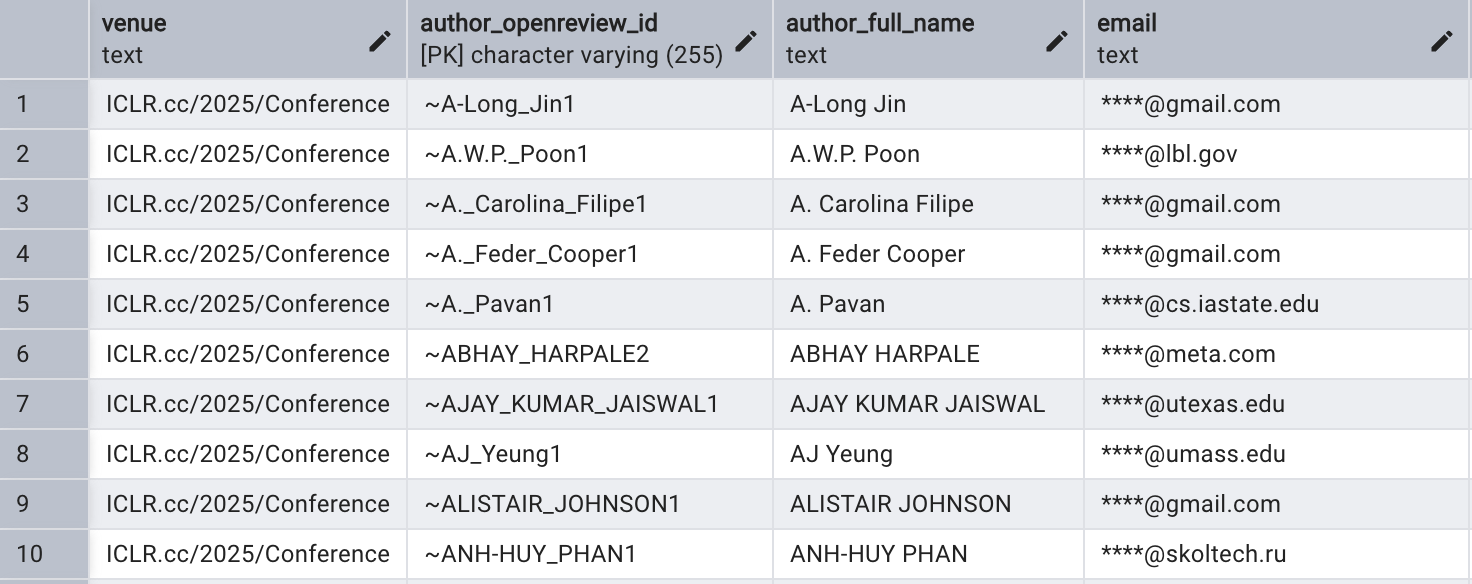

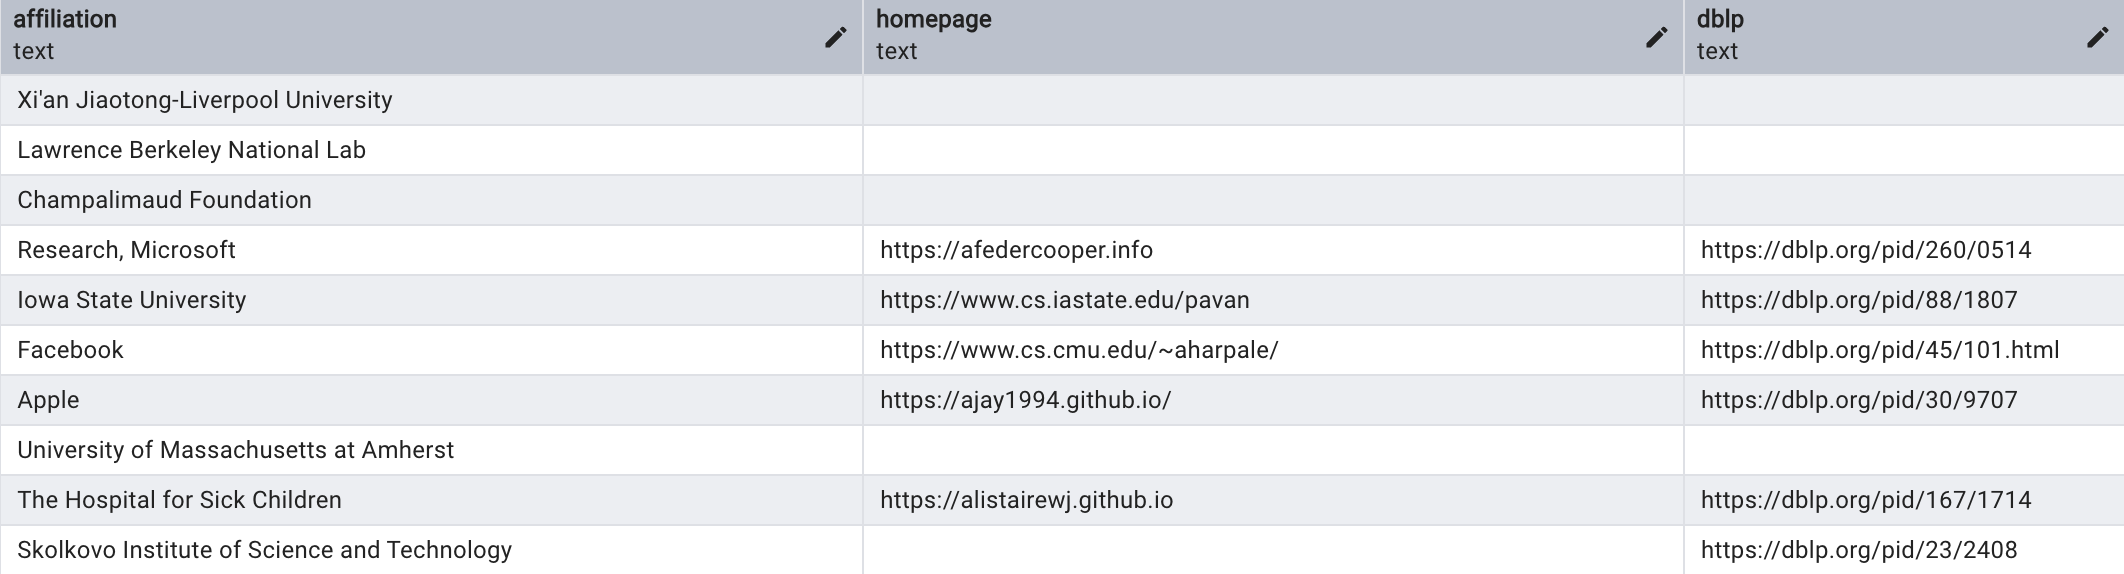

In [4]:
venue_id = 'ICLR.cc/2025/Conference'
sql_database.construct_author_table(venue_id)

Table 'authors' created successfully.


100%|██████████| 28821/28821 [00:03<00:00, 8286.11it/s]


#### reviews

"Venue", "Paper Openreview ID", "Review Openreview ID", "Replyto Openreview ID", "Writer", "Title", "Content", "Time"

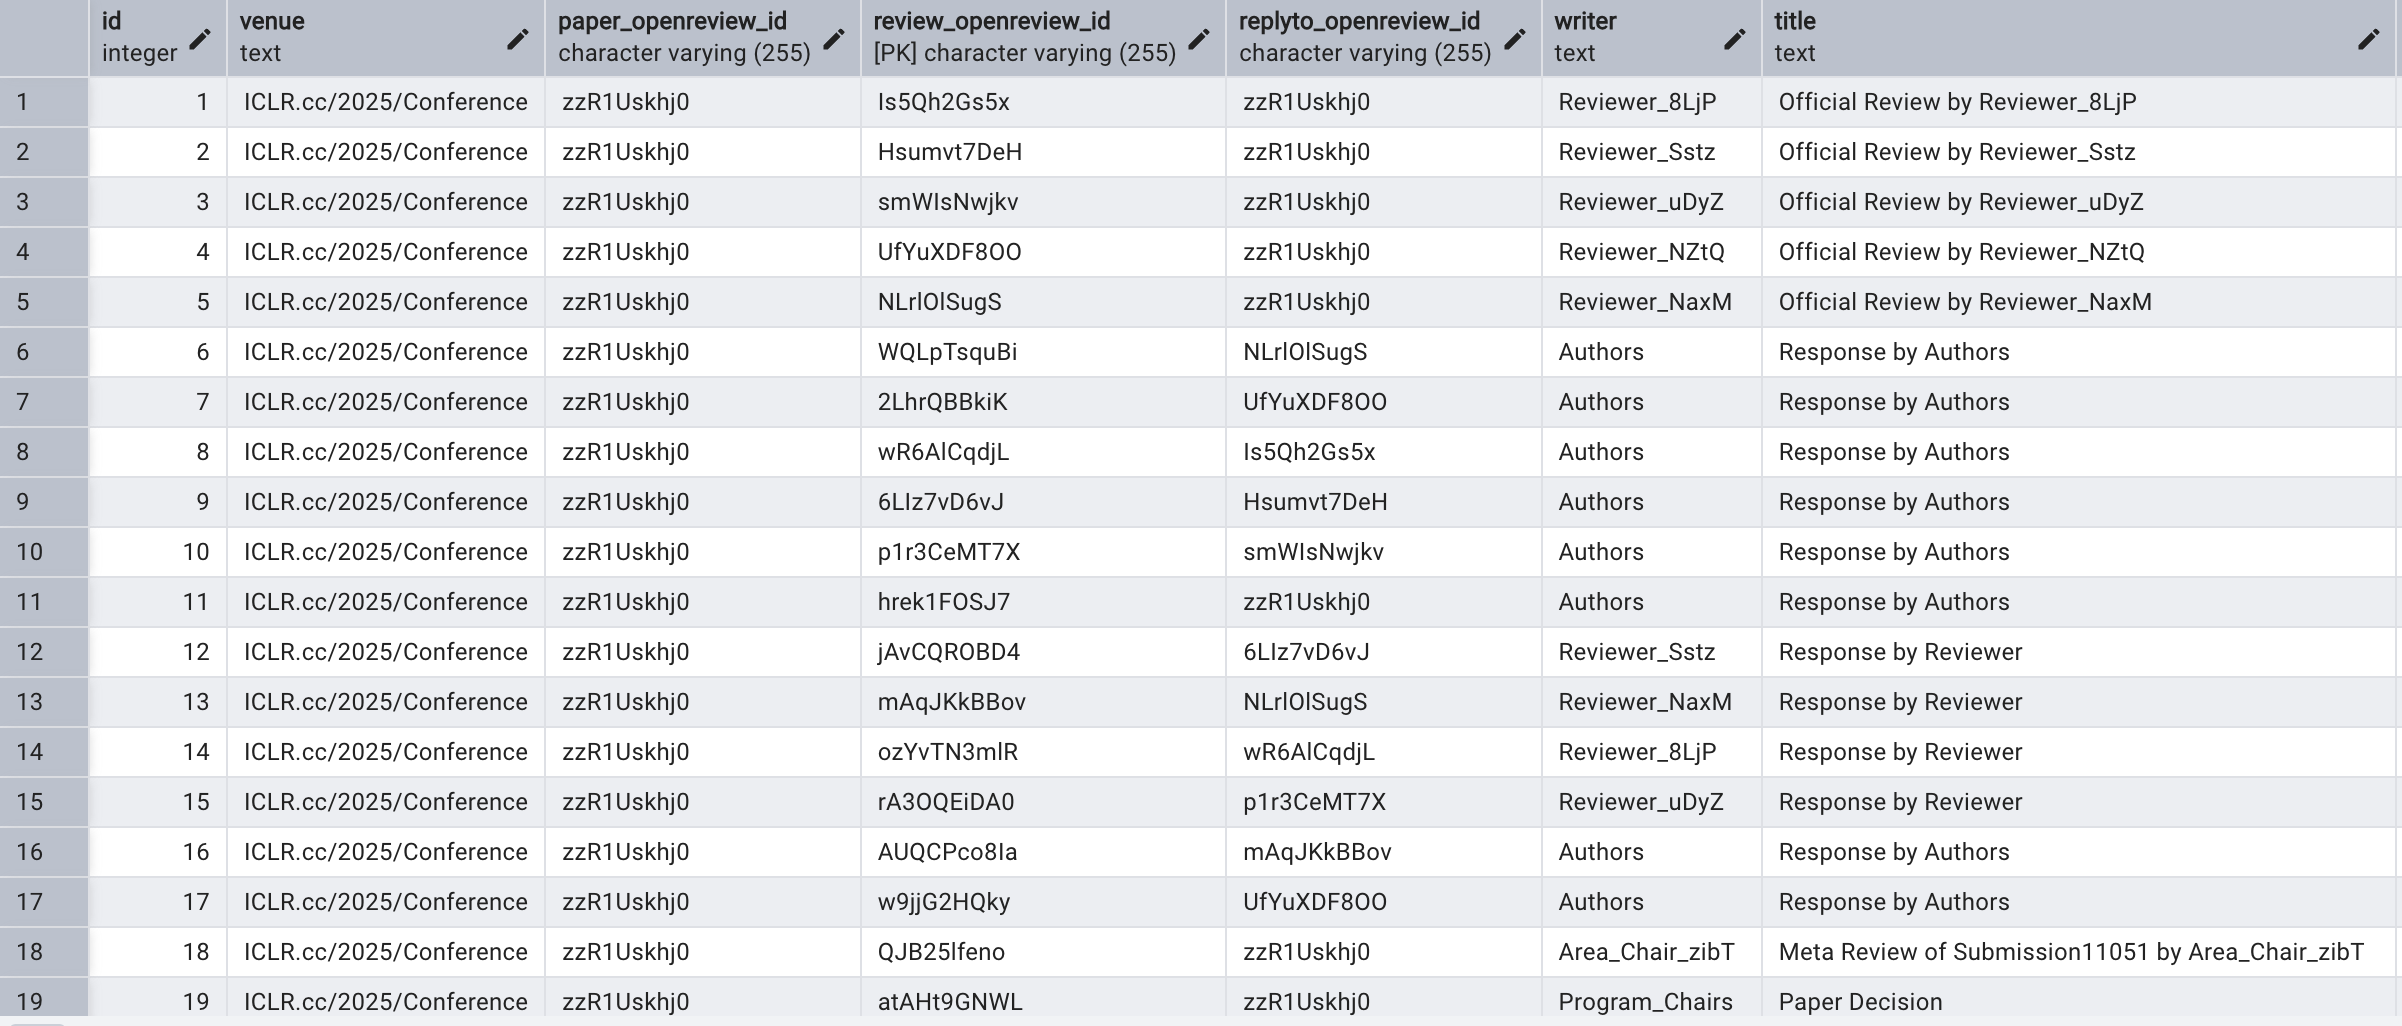

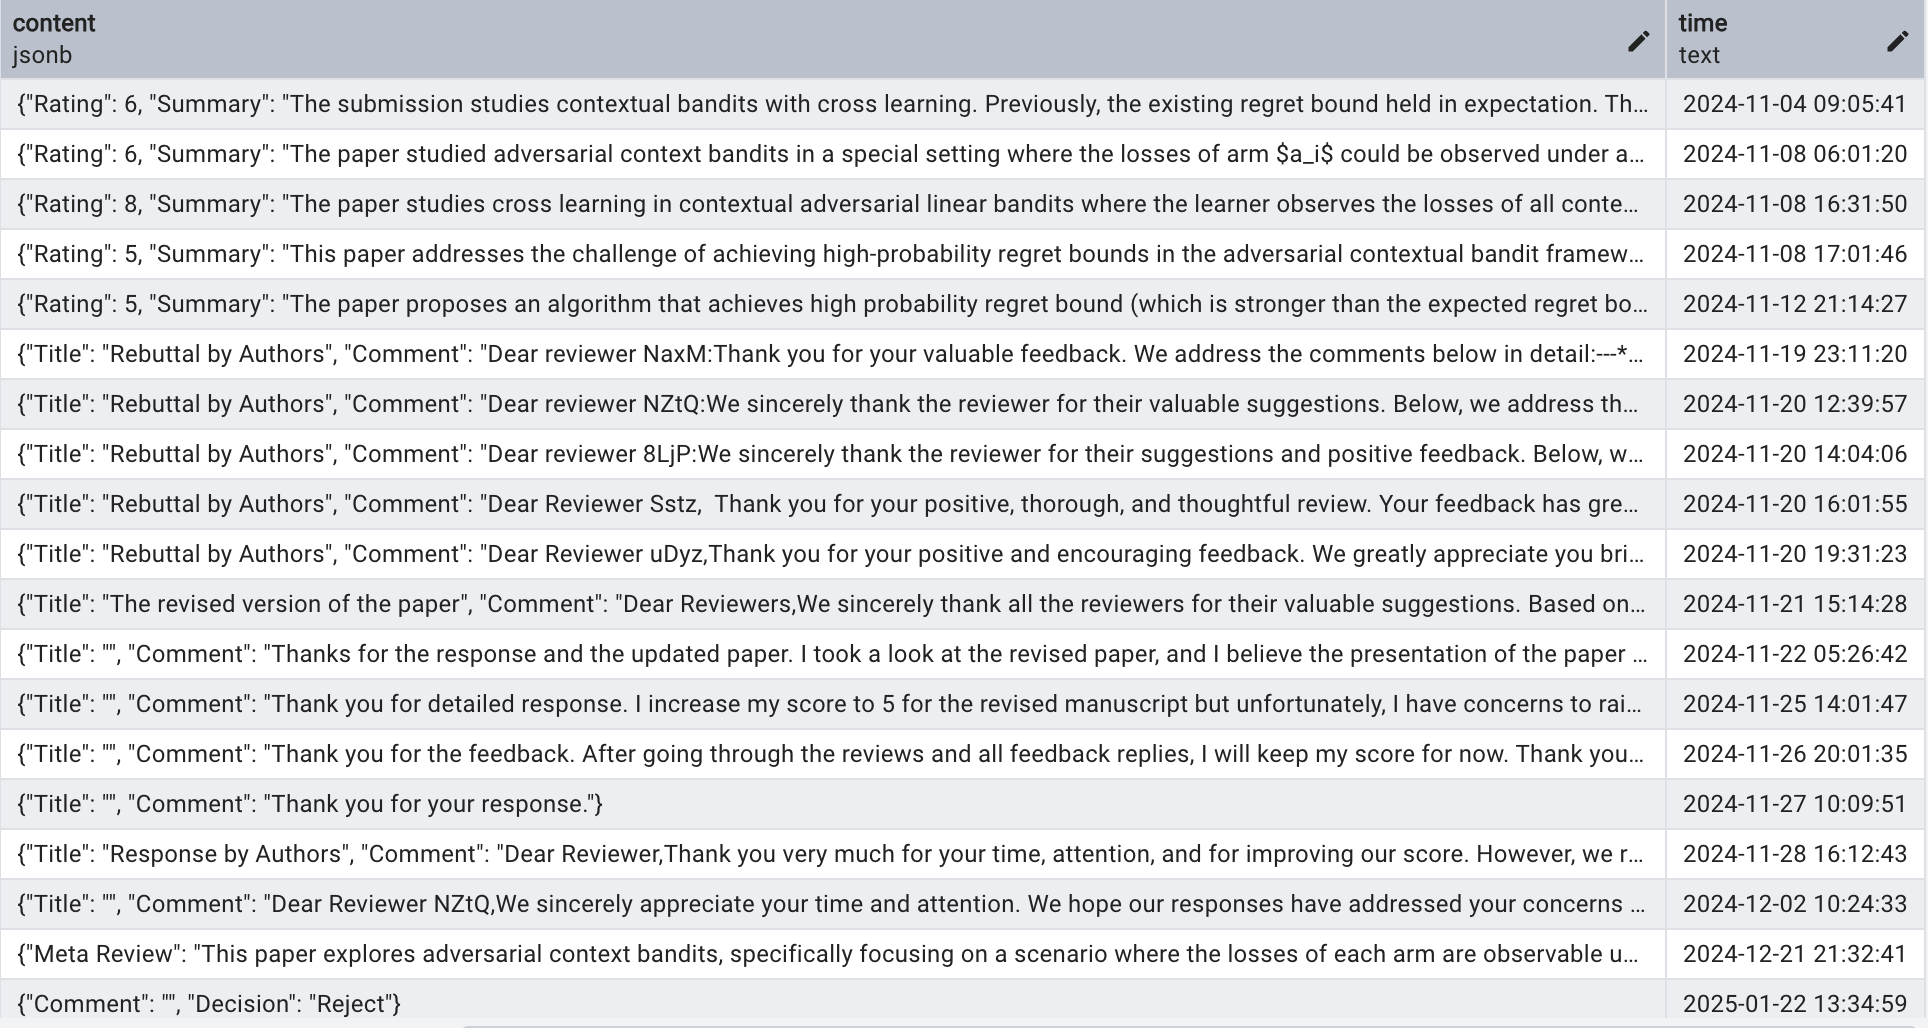

In [3]:
venue_id = 'ICLR.cc/2025/Conference'
sql_database.construct_review_table(venue_id)

Table 'reviews' created successfully.


100%|██████████| 11672/11672 [02:15<00:00, 86.33it/s] 
